In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
default_subset = pd.read_csv("default_subset.csv")
default_subset

,default,student,balance,income
0,No,Yes,817.1804,12106.14
1,Yes,Yes,1486.9980,17854.40
2,Yes,Yes,1102.4350,17391.78
3,Yes,Yes,1233.4460,12586.48
4,Yes,Yes,1276.6850,19282.44
5,Yes,Yes,1289.2460,13624.55
6,No,Yes,673.8124,17672.29
7,No,No,870.4124,17685.45
8,No,Yes,903.1768,15810.57
9,No,Yes,879.6270,14898.31


C:\Users\hsbc_2019\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


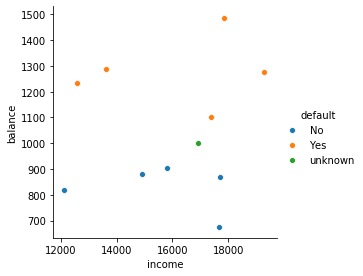

In [3]:
#Visualize the data
import seaborn as sns
sns.pairplot(default_subset, hue="default", x_vars="income",y_vars="balance",size=4)

In [4]:
#Euclidean distance between x1 and x2

x1 = default_subset.loc[0,["balance","income"]]

x2 = default_subset.loc[1,["balance","income"]]

np.linalg.norm(x1-x2)

5787.1537602581275

In [5]:
t1 = np.array([26,1000])
t2 = np.array([66,1000])
t3 = np.array([36,10000])

dist_t2_t3 = np.linalg.norm(t2-t3)
dist_t3_t1 = np.linalg.norm(t3-t1)
print("Distance between t2 and t3", dist_t2_t3)
print("\nDistance between t1 and t3", dist_t3_t1)


Distance between t2 and t3 9000.049999861112

Distance between t1 and t3 9000.00555555384


C:\Users\hsbc_2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hsbc_2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hsbc_2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hsbc_2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hsbc_2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConvers

0.75 1.0


C:\Users\hsbc_2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hsbc_2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hsbc_2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hsbc_2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hsbc_2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConvers

C:\Users\hsbc_2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hsbc_2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hsbc_2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hsbc_2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hsbc_2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConvers

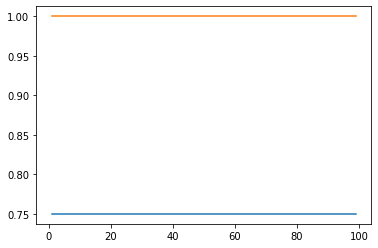

In [27]:
#Normalize the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_scale = ["balance","income"]
scaled_values = scaler.fit_transform(default_subset[features_to_scale])
default_subset["norm_balance"] = scaled_values[:,0]
default_subset["norm_income"] = scaled_values[:,1]
default_subset.head()


#Split data into train and test set
from sklearn.model_selection import train_test_split
default_train, default_test = train_test_split(default_subset, test_size=0.2, random_state=100)
default_train.shape, default_test.shape

#build the model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")

features = ["norm_balance","norm_income"]
target = ["default"]
model.fit(default_train[features], default_train[target])

#evaluate model performance on train and test set
train_accuracy = model.score(default_train[features],default_train[target])
test_accuracy = model.score(default_test[features],default_test[target])
print(train_accuracy, test_accuracy)


#performance measured on different values of k
train_accuracies = []
test_accuracies = []
k_vals = [i for i in range(1,100)]
features = ["norm_balance", "norm_income"]
target = ["default"]
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
    model.fit(default_train[features],default_train[target])
    train_accuracy_k = model.score(default_train[features],default_train[target])
    test_accuracy_k = model.score(default_test[features],default_test[target])
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)

plt.plot(k_vals, train_accuracies)
plt.plot(k_vals, test_accuracies)


In [21]:
#Euclidean distance between x1 and x2 after normalization

x1_n = default_subset.loc[0,["norm_balance","norm_income"]]
x2_n = default_subset.loc[1,["norm_balance","norm_income"]]
np.linalg.norm(x1_n-x2_n)

1.1489497815843785

In [8]:
#Prediction based on nearest neighbors

x11 = default_subset.loc[10, ["norm_balance","norm_income"]]
dist_to_X11 = lambda x : np.linalg.norm(x-x11)

default_subset["dist_toX11"] = default_subset[["norm_balance", "norm_income"]].apply(dist_to_X11, axis=1)

default_subset.sort_values("dist_toX11")

,default,student,balance,income,norm_balance,norm_income,dist_toX11
10,unknown,Yes,1000.0000,16900.00,0.401123,0.668013,0.000000
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541,0.143401
8,No,Yes,903.1768,15810.57,0.282057,0.516203,0.192932
7,No,No,870.4124,17685.45,0.241765,0.777463,0.193325
9,No,Yes,879.6270,14898.31,0.253097,0.389082,0.315775
6,No,Yes,673.8124,17672.29,0.000000,0.775630,0.415309
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000,0.475378
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587,0.578657
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006,0.613466
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934,0.666114
